In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/home/aritra/Downloads/Datasets/BankNote_Authentication.csv')

In [5]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
data.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [7]:
print("Positive records:", data['class'].value_counts().iloc[0])
print("Negative records:", data['class'].value_counts().iloc[1])

Positive records: 762
Negative records: 610


In [8]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [10]:
x=data[['variance','skewness','curtosis','entropy']]
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [11]:
y=data['class']
y.tail()

1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

In [14]:
x_train_unscaled,x_test_unscaled,y_train_unscaled,y_test_unscaled=x_train,x_test,y_train,y_test

In [15]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [16]:
x_train

array([[-0.6391558 ,  1.80557961, -0.18836535, -3.05096841],
       [ 0.82188925,  0.85239902, -0.59407847,  0.60345479],
       [-1.65703344, -1.63328321,  2.38386151, -0.34235536],
       ...,
       [-2.62138845,  1.26364283, -0.3095615 , -1.608634  ],
       [-1.36636167,  0.14870015, -0.31055139,  0.07724503],
       [-1.33045764, -1.52810408,  2.29230217,  0.29354966]])

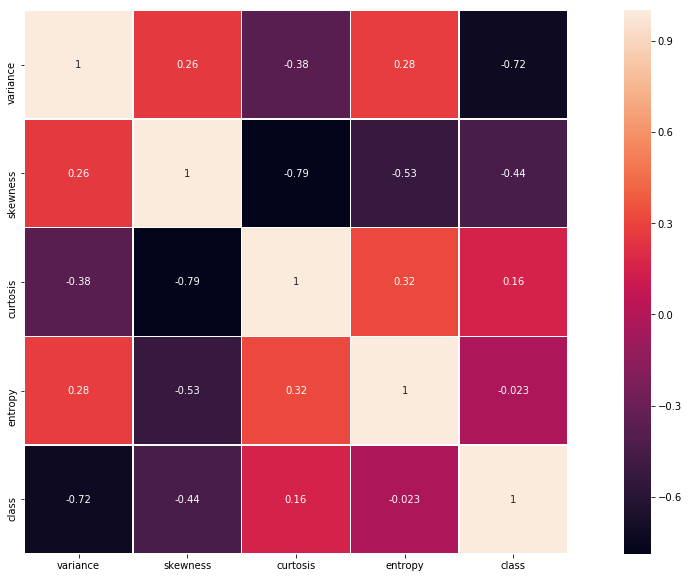

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.show()

In [18]:
print("X_train shape: {}".format(x_train.shape))
print("X_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1097, 4)
X_test shape: (275, 4)
y_train shape: (1097,)
y_test shape: (275,)


<Figure size 1296x720 with 0 Axes>

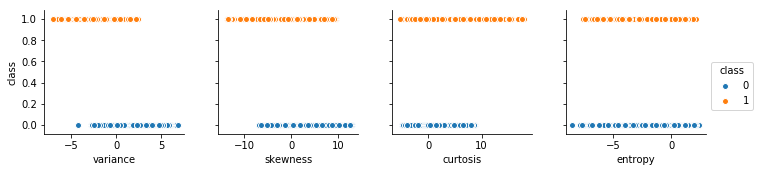

In [19]:
plt.figure(figsize=(18,10))
sns.pairplot(data,hue='class',x_vars=['variance','skewness','curtosis','entropy'],y_vars=['class'],diag_kind='kde')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_predict=classifier.predict(x_test)

In [22]:
y_predict


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix
results=confusion_matrix(y_test,y_predict)
print(results)

[[148   0]
 [  2 125]]


In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [25]:
print("Random Forest Classifier on scaled test data:")
print("Accuracy:", classifier.score(x_test, y_test))
print("Precision:", precision_score(y_test,classifier.predict(x_test)))
print("Recall:", recall_score(y_test,classifier.predict(x_test)))
print("F-1 score:", f1_score(y_test,classifier.predict(x_test)))


Random Forest Classifier on scaled test data:
Accuracy: 0.9927272727272727
Precision: 1.0
Recall: 0.984251968503937
F-1 score: 0.9920634920634921


In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(x_train_unscaled,y_train_unscaled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y_predict_for_unscaled=classifier.predict(x_test_unscaled)
y_predict_for_unscaled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [28]:
results1=confusion_matrix(y_test_unscaled,y_predict_for_unscaled)
print(results1)

[[148   0]
 [  2 125]]


In [29]:
print("Random Forest Classifier on unscaled test data:")
print("Accuracy:", classifier.score(x_test, y_test))
print("Precision:", precision_score(y_test,classifier.predict(x_test)))
print("Recall:", recall_score(y_test,classifier.predict(x_test)))
print("F-1 score:", f1_score(y_test,classifier.predict(x_test)))

Random Forest Classifier on unscaled test data:
Accuracy: 0.6509090909090909
Precision: 0.5695067264573991
Recall: 1.0
F-1 score: 0.7257142857142856


In [30]:
x.shape[1]

4

In [31]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


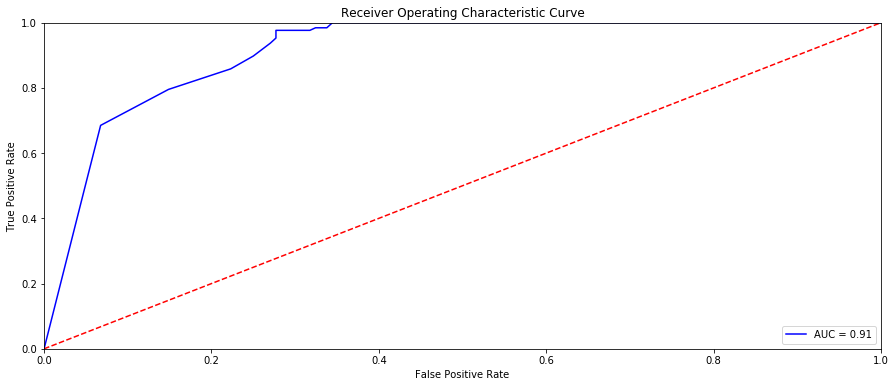

In [32]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# K FOLD CROSS VALIDATION

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits=5,shuffle=True,random_state=4)
model=RandomForestClassifier(n_estimators=50)
cv_results = cross_val_score(model, x_train, y_train, cv = folds, scoring = 'accuracy') 

In [34]:
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.97272727 0.99545455 0.99543379 0.99086758 0.99543379]
mean accuracy = 0.989983395599834
